In [1]:
from source.LBM_2D import LatticeBoltzmann2D
import numpy as np
import matplotlib.pyplot as plt

## LBM 2D with thermal transfer

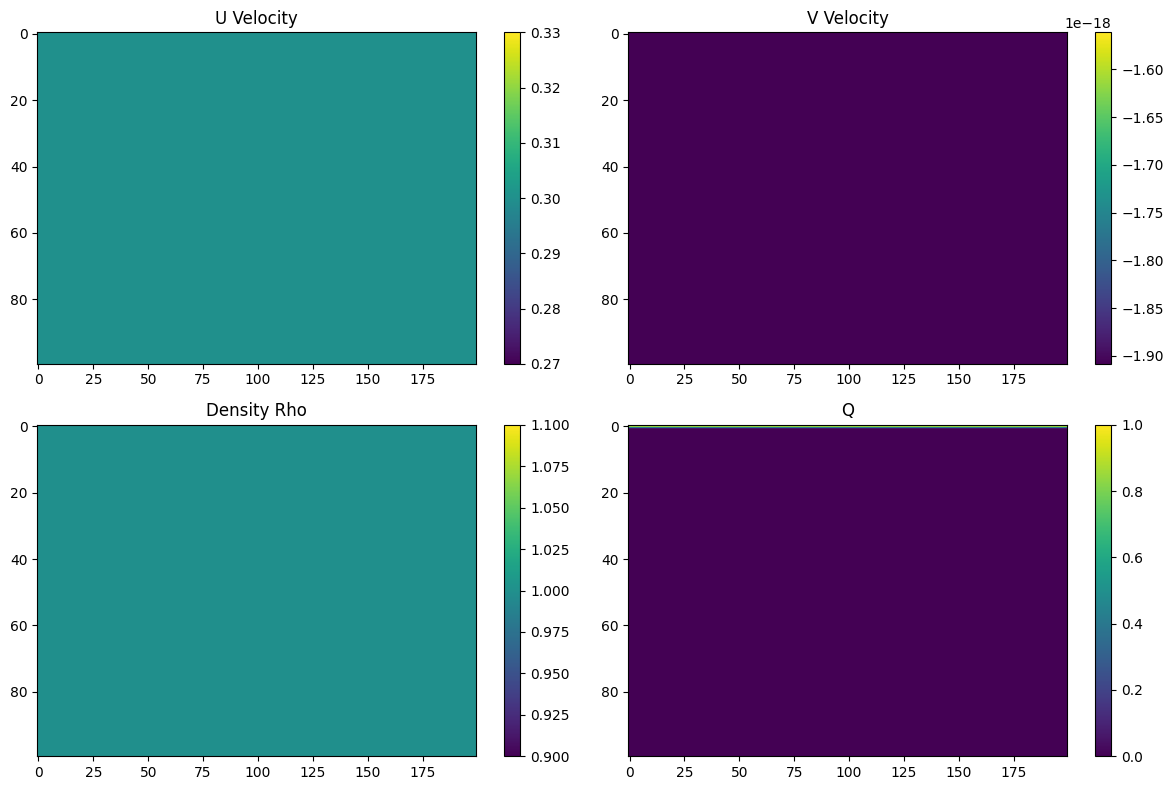

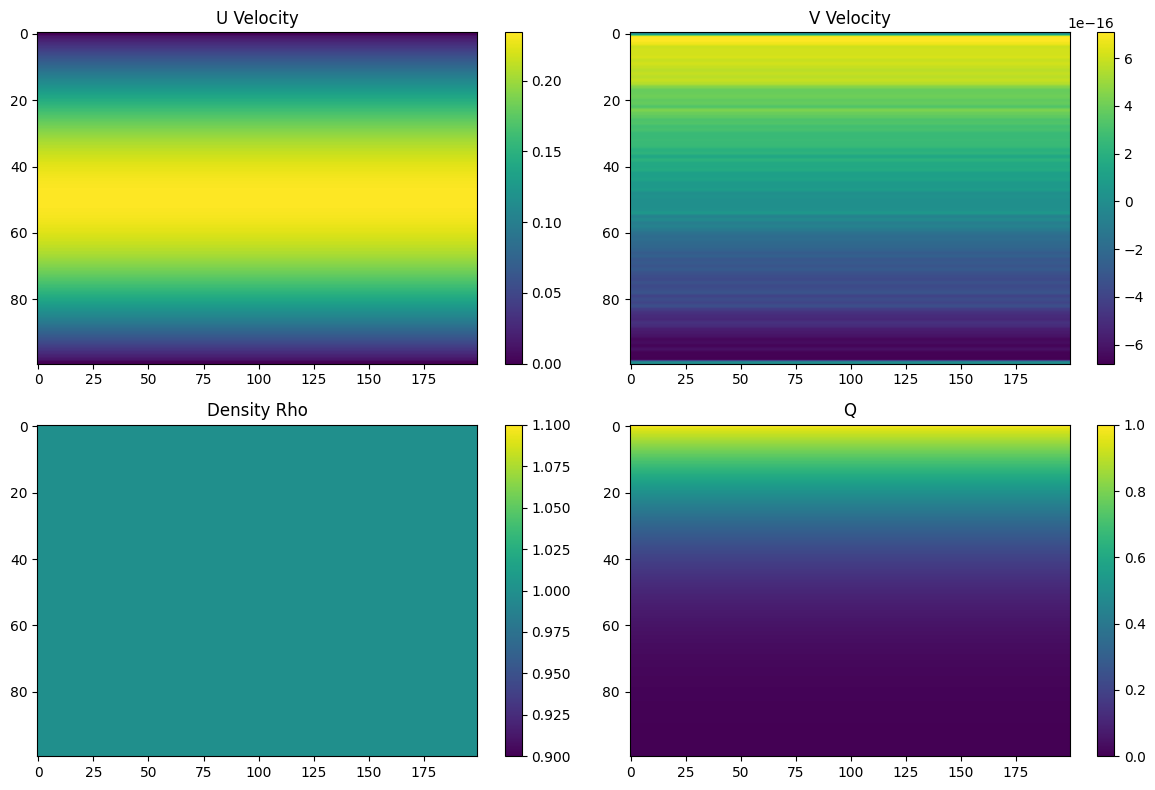

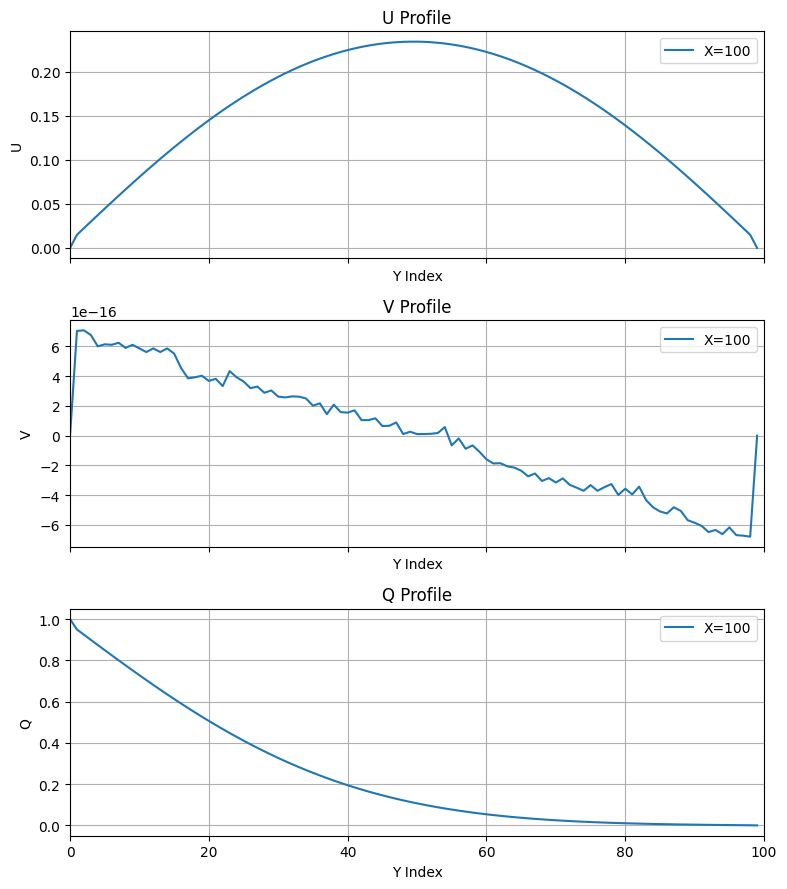

In [7]:
        def boundary(sim):
                """
                Apply boundary conditions.
                """
                sim.Q[:, 0] = 1
                sim.Q[:, sim.Ny - 1] = 0
        
                sim.XF[:, 0, 4, :] = sim.XF[:, 0, 3, :]
                sim.XF[:, 0, 6, :] = sim.XF[:, 0, 5, :]
                sim.XF[:, 0, 7, :] = sim.XF[:, 0, 8, :]
        
                sim.XF[:, sim.Ny - 1, 3, :] = sim.XF[:, sim.Ny - 1, 4, :]
                sim.XF[:, sim.Ny - 1, 5, :] = sim.XF[:, sim.Ny - 1, 6, :]
                sim.XF[:, sim.Ny - 1, 8, :] = sim.XF[:, sim.Ny - 1, 7, :]
        
                sim.XF[0, :, :, :] = sim.XF[sim.Nx - 2, :, :, :]
                sim.XF[sim.Nx - 1, :, :, :] = sim.XF[1, :, :, :]
        
                sim.equilibrium()
                sim.XF[:, 0, :, 1] = sim.XFEQ[:, 0, :, 1]
                sim.XF[:, sim.Ny - 1, :, 1] = sim.XFEQ[:, sim.Ny - 1, :, 1]
        
        Nx, Ny = 200, 100
        lbm = LatticeBoltzmann2D(Nx, Ny, U0=0.3, Tau=2.0, nt=1000)
        
        lbm.add_boundary_condition(boundary)
        
        lbm.initialize()
        
        lbm.plot_moments(save="./figures/2D_heat_velocity_init.png")
        
        lbm.simulate()
        
        lbm.plot_moments(save="./figures/2D_heat_velocity_moments.png")
        lbm.plot_profile([100], ["U", 'V', 'Q'], save="./figures/2D_heat_velocity_profiles.png")

## Obstacle

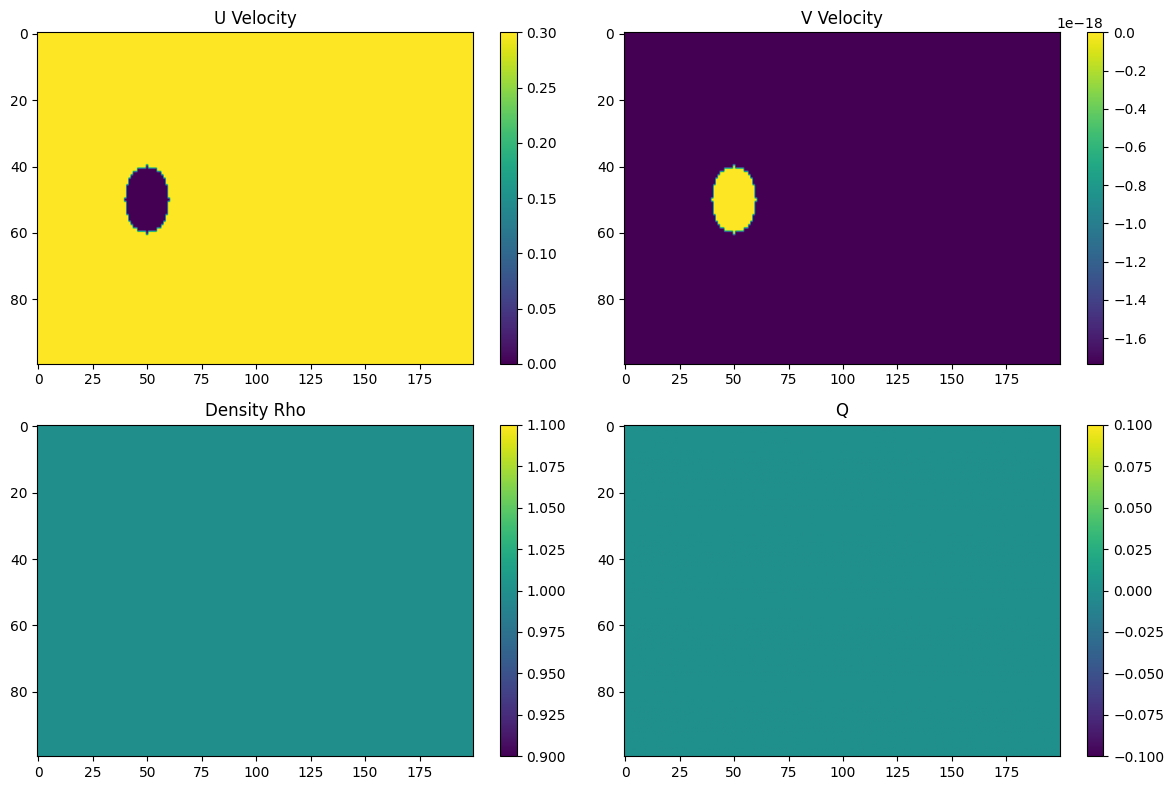

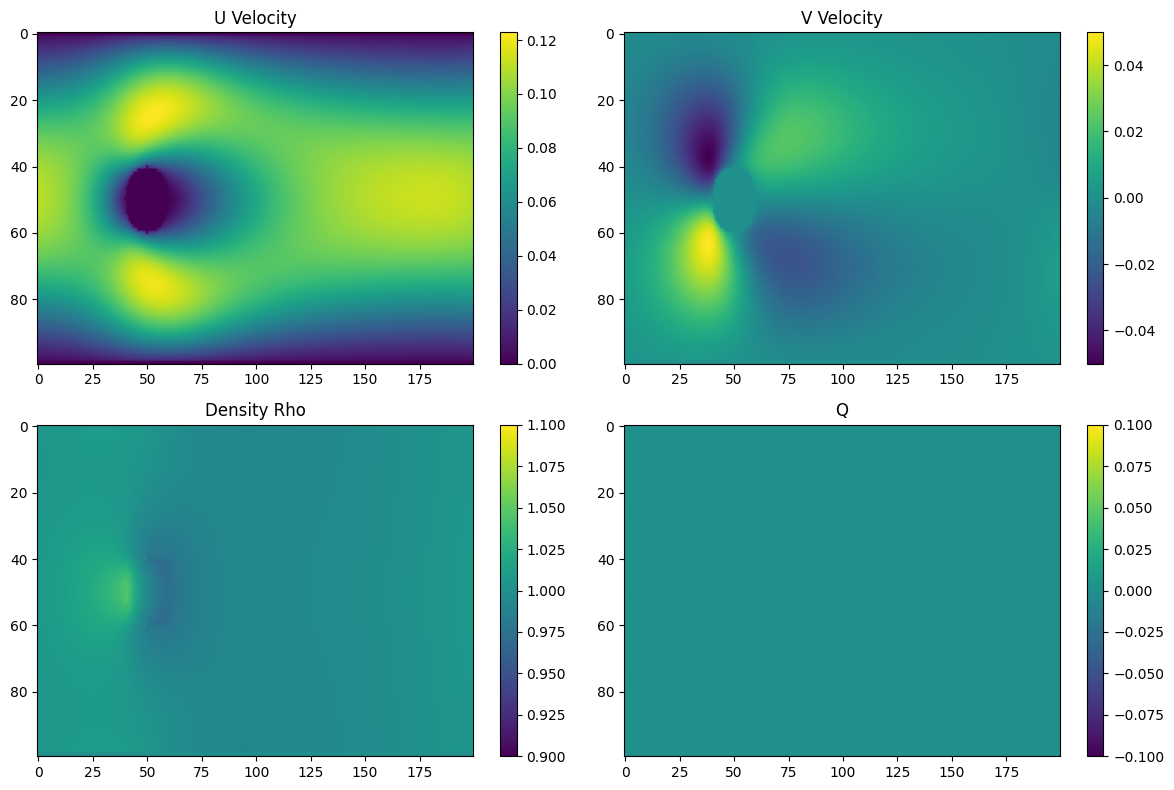

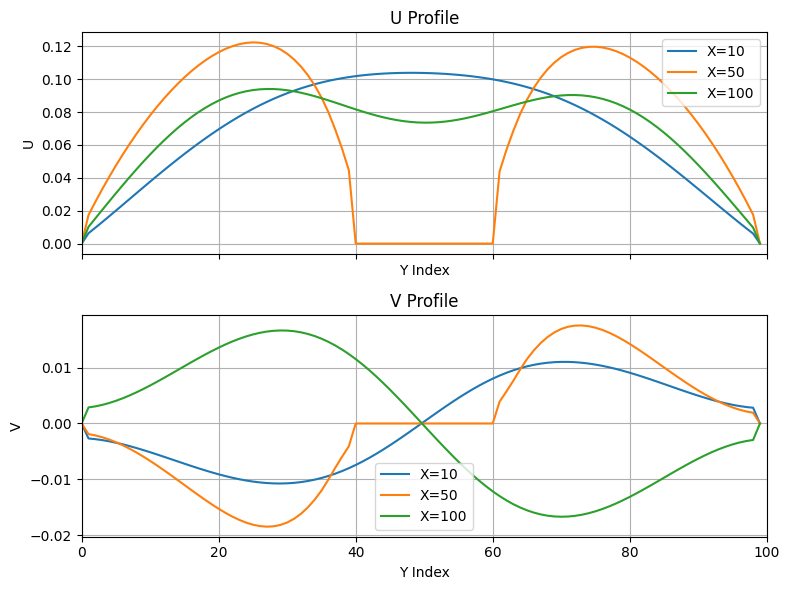

In [10]:
def boundary(sim):
        sim.XF[:, 0, 4, :] = sim.XF[:, 0, 3, :]
        sim.XF[:, 0, 6, :] = sim.XF[:, 0, 5, :]
        sim.XF[:, 0, 7, :] = sim.XF[:, 0, 8, :]

        sim.XF[:, sim.Ny - 1, 3, :] = sim.XF[:, sim.Ny - 1, 4, :]
        sim.XF[:, sim.Ny - 1, 5, :] = sim.XF[:, sim.Ny - 1, 6, :]
        sim.XF[:, sim.Ny - 1, 8, :] = sim.XF[:, sim.Ny - 1, 7, :]

        sim.XF[0, :, :, :] = sim.XF[sim.Nx - 2, :, :, :]
        sim.XF[sim.Nx - 1, :, :, :] = sim.XF[1, :, :, :]

        sim.equilibrium()
        sim.XF[:, 0, :, 1] = sim.XFEQ[:, 0, :, 1]
        sim.XF[:, sim.Ny - 1, :, 1] = sim.XFEQ[:, sim.Ny - 1, :, 1]

Nx, Ny = 200, 100
lbm = LatticeBoltzmann2D(Nx, Ny, U0=0.3, Tau=2.0, nt=1000)

lbm.add_boundary_condition(boundary)

x, y = np.meshgrid(np.arange(Nx), np.arange(Ny), indexing='ij')
center = (50, 50)
radius = 10
mask = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2

lbm.add_obstacle(mask)

lbm.initialize()

lbm.plot_moments(save="./figures/2D_obstacles_velocity_moments_init.png")

lbm.simulate()

lbm.plot_moments(save="./figures/2D_obstacles_velocity_moments.png")
lbm.plot_profile([10,50,100], ["U", 'V'], save="./figures/2D_obstacles_velocity_profiles.png")

## Heating wire

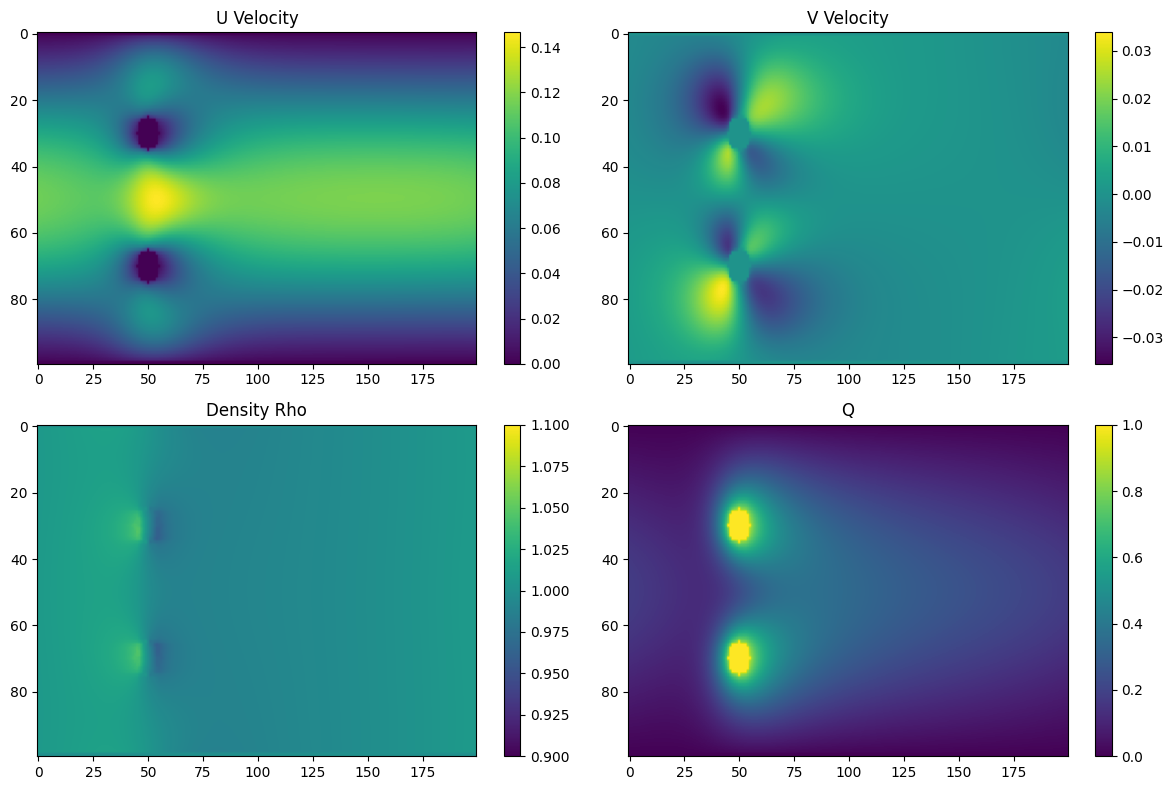

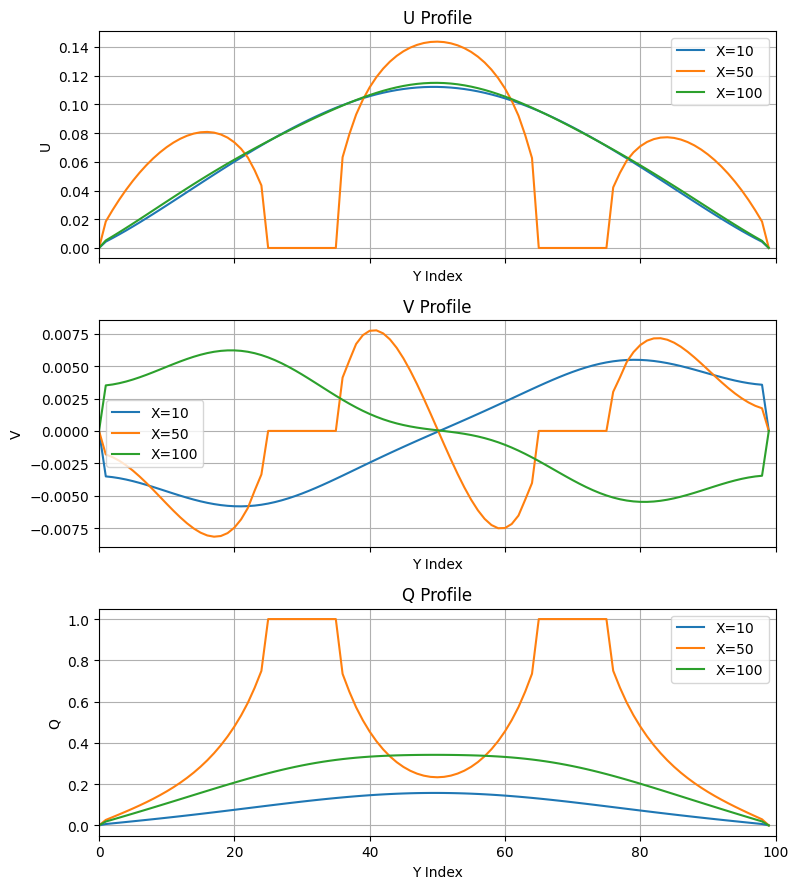

In [12]:
def boundary(sim):
        sim.XF[:, 0, 4, :] = sim.XF[:, 0, 3, :]
        sim.XF[:, 0, 6, :] = sim.XF[:, 0, 5, :]
        sim.XF[:, 0, 7, :] = sim.XF[:, 0, 8, :]

        sim.XF[:, sim.Ny - 1, 3, :] = sim.XF[:, sim.Ny - 1, 4, :]
        sim.XF[:, sim.Ny - 1, 5, :] = sim.XF[:, sim.Ny - 1, 6, :]
        sim.XF[:, sim.Ny - 1, 8, :] = sim.XF[:, sim.Ny - 1, 7, :]

        sim.XF[0, :, :, :] = sim.XF[sim.Nx - 2, :, :, :]
        sim.XF[sim.Nx - 1, :, :, :] = sim.XF[1, :, :, :]

        sim.equilibrium()
        sim.XF[:, 0, :, 1] = sim.XFEQ[:, 0, :, 1]
        sim.XF[:, sim.Ny - 1, :, 1] = sim.XFEQ[:, sim.Ny - 1, :, 1]

Nx, Ny = 200, 100
lbm = LatticeBoltzmann2D(Nx, Ny, U0=0.3, Tau=2.0, nt=1000)

lbm.add_boundary_condition(boundary)

x, y = np.meshgrid(np.arange(Nx), np.arange(Ny), indexing='ij')
center = (50, 30)
radius = 5
mask = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2
center = (50, 70)
radius = 5
mask = mask + ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius ** 2)

lbm.add_obstacle(mask, Q=1)

lbm.initialize()

#lbm.plot_moments()

lbm.simulate()

lbm.plot_moments(save="./figures/2D_heating_velocity_moments.png")
lbm.plot_profile([10,50,100], ["U", 'V', 'Q'], save="./figures/2D_heating_velocity_profile.png")